2023-08-24 10:41:39.576768: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 10:41:39.580163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 10:41:39.651618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 10:41:39.653966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 10:41:41.682882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [1]:
import pandas as pd

# Tạo DataFrame mẫu
df = pd.DataFrame({
    'Màu': ['đỏ', 'xanh', 'xanh']
})

# Thực hiện one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Màu'], prefix='', prefix_sep='')

print(encoded_df)


    xanh     đỏ
0  False   True
1   True  False
2   True  False


In [3]:

from tensorflow import keras

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
])

In [7]:
import numpy as np
import tensorflow as tf

# Create a simple grayscale image (5x5)
image = np.array([[10, 20, 30, 40, 50],
                  [15, 25, 35, 45, 55],
                  [20, 30, 40, 50, 60],
                  [25, 35, 45, 55, 65],
                  [30, 40, 50, 60, 70]], dtype=np.float32)

# Create a simple filter (3x3)
filter = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Reshape the image and filter to match TensorFlow's requirements
image = image.reshape(1, 5, 5, 1)
filter = filter.reshape(3, 3, 1, 1)

# Create TensorFlow tensors from the NumPy arrays
image_tensor = tf.convert_to_tensor(image)
filter_tensor = tf.convert_to_tensor(filter)

# Perform filter multiplication using TensorFlow's convolution
result = tf.nn.conv2d(image_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='VALID')

# Run a TensorFlow session to get the result
print("Original Image:\n", image_tensor.numpy())
print("\nFilter:\n", filter_tensor.numpy())
print("\nResult:\n", result.numpy())

Original Image:
 [[[[10.]
   [20.]
   [30.]
   [40.]
   [50.]]

  [[15.]
   [25.]
   [35.]
   [45.]
   [55.]]

  [[20.]
   [30.]
   [40.]
   [50.]
   [60.]]

  [[25.]
   [35.]
   [45.]
   [55.]
   [65.]]

  [[30.]
   [40.]
   [50.]
   [60.]
   [70.]]]]

Filter:
 [[[[ 1.]]

  [[ 0.]]

  [[-1.]]]


 [[[ 2.]]

  [[ 0.]]

  [[-2.]]]


 [[[ 1.]]

  [[ 0.]]

  [[-1.]]]]

Result:
 [[[[-80.]
   [-80.]
   [-80.]]

  [[-80.]
   [-80.]
   [-80.]]

  [[-80.]
   [-80.]
   [-80.]]]]


In [8]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 54s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

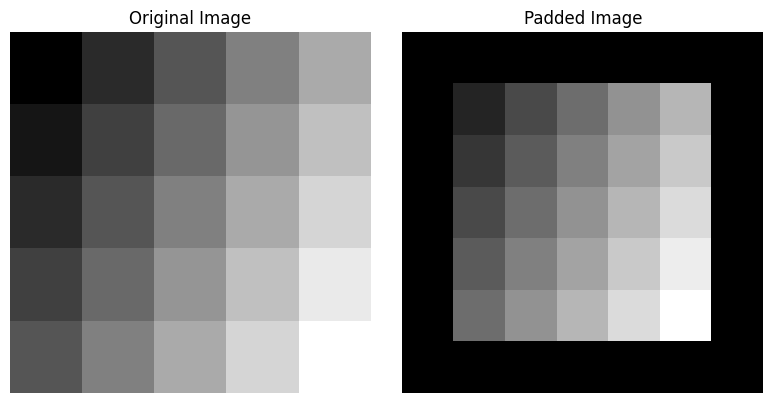

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple grayscale image (5x5)
image = np.array([[10, 20, 30, 40, 50],
                  [15, 25, 35, 45, 55],
                  [20, 30, 40, 50, 60],
                  [25, 35, 45, 55, 65],
                  [30, 40, 50, 60, 70]], dtype=np.float32)

# Add padding of size 1 to the image
padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

# Visualize the original and padded images using matplotlib
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(padded_image, cmap='gray')
plt.title("Padded Image")
plt.axis('off')

plt.tight_layout()
plt.show()
